In [8]:
from PIL import Image
from vangogh.evolution import Evolution
from vangogh.fitness import draw_voronoi_image
from vangogh.util import IMAGE_SHRINK_SCALE
from vangogh.evaluation import *
from IPython.display import display, clear_output
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
from mpl_toolkits.axes_grid1 import ImageGrid
plt.style.use('classic')
%matplotlib inline

from multiprocess import Pool, cpu_count
import sys
import csv
import seaborn as sns


# Enable to show live rendering of best individual during optimization
display_output = False
# Enable to save progress images at every 50th generation
save_progress = True
# Enable to print verbose output per generation
verbose_output = True

def reporter(time, evo):
    if save_progress or display_output:
        elite = draw_voronoi_image(evo.elite, evo.reference_image.width, evo.reference_image.height, scale=IMAGE_SHRINK_SCALE)
    if display_output:
        clear_output()
        display(elite)
    if save_progress and time["num-generations"] % 50 == 0:
        elite.save(f"./img/van_gogh_intermediate_{evo.seed}_{evo.population_size}_{evo.crossover_method}_{evo.num_points}_{evo.initialization}_{evo.generation_budget}_{time['num-generations']:05d}.png")
        

def run_algorithm(settings, ref):
    population_size, generation_budget, crossover_method, mutation_method, mutation_probability, \
        mutation_candidate_size, optimize_color, optimize_color_method, selection_name, initialization = settings

    output_file = f"./output/{population_size}_{generation_budget}_{crossover_method}_{mutation_method}_{mutation_probability}_{mutation_candidate_size}_{optimize_color}_{optimize_color_method}_{selection_name}_{initialization}.txt"
    with open(output_file, "w") as f:
        original_stdout = sys.stdout
        sys.stdout = f

#         print("population_size, generation_budget, crossover_method, mutation_method, mutation_probability, mutation_candidate_size, optimize_color, optimize_color_method, selection_name, initialization")
#         print(settings)
    
        start = time()
        data = []
        
        evo = Evolution(100, # num_points, # use only 100 or 50, use 50 will make our life easier
                        ref,
#                         REFERENCE_IMAGE,
                        # evolution_type='p+o',
                        population_size=population_size,
                        generation_budget=generation_budget,
                        # evaluation_budget=-1,
                        crossover_method=crossover_method,
                        mutation_method=mutation_method,
                        mutation_probability=mutation_probability, # default 'inv_genotype_length'
                        num_features_mutation_strength=.25, # only in DEFAULT mutation_method
                        # num_features_mutation_strength_decay=None,
                        # num_features_mutation_strength_decay_generations=None,
                        mutation_candidate_size=mutation_candidate_size,  # doesn't matter for DEFAULT mutation_method
                        optimize_color=optimize_color,
                        optimize_color_method=optimize_color_method, # "AVERAGE", "DOMINANT", or "COORD"; whatever when optimize_color==False
                        selection_name=selection_name, # tournament_4 was the original
                        initialization=initialization, # initialization method
                        # noisy_evaluations=False,
                        verbose=True,
                        generation_reporter=reporter,
                        seed=0)
        data = evo.run(9)
        time_spent = time() - start
        print(f"Time spent: {time_spent} seconds")

        sys.stdout = original_stdout
        
        return data

        
# population_size, generation_budget, crossover_method, mutation_method, mutation_probability, \
#         mutation_candidate_size, optimize_color, optimize_color_method, initialization
def get_settings(population_size=100, generation_budget=500, crossover_method="ONE_POINT", 
                 mutation_method="DEFAULT", mutation_probability='inv_genotype_length',
                 mutation_candidate_size=5, optimize_color=False, optimize_color_method="AVERAGE", 
                 selection_name='tournament_2', initialization="RANDOM"):
    
#     print(f"population_size={population_size}, generation_budget={generation_budget}, crossover_method={crossover_method}, \
#           mutation_method={mutation_method}, mutation_probability={mutation_probability}, mutation_candidate_size={mutation_candidate_size}, \
#           optimize_color={optimize_color}, optimize_color_method={optimize_color_method}, \
#           selection_name={selection_name}, initialization={initialization}")
    
    return (population_size, generation_budget, crossover_method, mutation_method, mutation_probability, 
            mutation_candidate_size, optimize_color, optimize_color_method, selection_name, initialization)

In [16]:
runs = 5

# Best: one average, oen coord, two ave, 1n

# time should be about the same, so just average and best fitness
# data.append(self.avg, self.elite_fitness)

def generate_data(crossover, method, ref):
    print("starting", crossover, method, ref)
    ret = []
    for i in range(runs):
        print("run ", i)
        data = run_algorithm(get_settings(initialization="PICK_AVERAGE_CELL_COLOR", crossover_method=crossover, optimize_color=True, optimize_color_method=method), ref)
        ret.append(data)

    with open(f"./output/{crossover}_{method}.txt", "w") as f:
        wr = csv.writer(f)
        wr.writerows(ret)
        
    print("done ", crossover, method, ref)
    return ret

#         REFERENCE_IMAGE = Image.open("./img/reference_image_resized.jpg").convert('RGB')
#         REFERENCE_IMAGE = Image.open("./img/mondriaan_reference_img_resized.jpg").convert('RGB')
#         REFERENCE_IMAGE = Image.open("./img/donald_reference_img_resized.jpg").convert('RGB')
#         REFERENCE_IMAGE = Image.open("./img/city_reference-im.jpg").convert('RGB')

In [11]:
REFERENCE_IMAGE = Image.open("./img/mondriaan_reference_img_resized.jpg").convert('RGB')

print("mondriaan_reference_img_resized baseline")
mondriaan_baseline = []

for i in range(5):
    print("run ", i)
    data = run_algorithm(get_settings(initialization="PICK_AVERAGE_CELL_COLOR", crossover_method="ONE_POINT", optimize_color=False), REFERENCE_IMAGE)
    mondriaan_baseline.append(data)

with open(f"./output/mondriaan_baseline.txt", "w") as f:
    wr = csv.writer(f)
    wr.writerows(mondriaan_baseline)

print("done mondriaan_reference_img_resized baseline")
print(mondriaan_baseline)

mondriaan_reference_img_resized baseline
run  0
run  1
run  2
run  3
run  4
done mondriaan_reference_img_resized baseline
[[[99782.68, 92145], [99699.87, 92145], [99536.52, 92145], [99142.05, 92145], [98923.21, 92145], [98848.65, 92145], [98398.46, 92145], [97503.56, 92145], [97383.35, 92145], [97217.91, 92145], [97104.14, 92145], [96650.42, 92145], [96491.02, 92041], [96526.59, 92041], [96134.37, 92041], [96033.66, 92041], [95547.95, 92041], [95424.22, 91503], [95060.76, 91345], [94498.74, 90133], [94247.17, 90133], [94001.81, 90133], [93873.96, 90133], [93728.73, 90133], [92990.81, 90025], [92517.49, 87963], [91925.78, 87274], [91481.24, 87274], [91012.34, 87274], [90568.97, 87274], [90018.14, 86004], [89363.19, 83936], [88600.87, 83936], [87818.22, 83936], [87243.23, 83936], [86615.21, 83936], [86090.98, 83927], [85608.11, 83927], [85187.35, 83690], [84960.26, 83674], [84659.08, 83290], [84386.97, 83290], [84167.4, 83115], [83973.16, 83070], [83832.72, 82850], [83685.97, 82695], [83

In [3]:
REFERENCE_IMAGE = Image.open("./img/mondriaan_reference_img_resized.jpg").convert('RGB')

# one average, oen coord, two ave
crossover = "ONE_POINT"
opt = "AVERAGE"

mondriaan_1a = generate_data(crossover, opt, REFERENCE_IMAGE) # result (self.avg, self.elite_fitness)

starting ONE_POINT AVERAGE <PIL.Image.Image image mode=RGB size=300x236 at 0x10340EE50>
run  0
run  1
run  2
run  3
run  4
run  5
run  6
run  7
run  8
run  9
done  ONE_POINT AVERAGE <PIL.Image.Image image mode=RGB size=300x236 at 0x10340EE50>


In [5]:
print(mondriaan_1a)

[[[100267.02, 88303], [97971.07, 88303], [96153.45, 88303], [95279.84, 87080], [94610.25, 87080], [93262.97, 87080], [92937.23, 87049], [92264.99, 87049], [91663.02, 86899], [91161.87, 86899], [90836.31, 86899], [90860.17, 86899], [90214.75, 85829], [89748.36, 85649], [89711.46, 85095], [89330.43, 85095], [89082.16, 83167], [89044.45, 83167], [88829.8, 83141], [88456.16, 83141], [88365.31, 83141], [88199.67, 83141], [87849.51, 83141], [87668.47, 83141], [87401.57, 82767], [87206.0, 82767], [87111.27, 82767], [87293.59, 82621], [86776.42, 81389], [86518.67, 81389], [86369.37, 81075], [85844.66, 81075], [85922.66, 81075], [85811.02, 81075], [85505.45, 81075], [84975.76, 80324], [84722.71, 80324], [85097.13, 80324], [84640.16, 79221], [84443.88, 79221], [84518.21, 79221], [84321.13, 79146], [83685.51, 79146], [83518.77, 79146], [83108.28, 79146], [82821.25, 78890], [82271.51, 78890], [81989.0, 77095], [81760.71, 77095], [81494.98, 77095], [81455.94, 77095], [81009.87, 76983], [81019.72, 7

In [40]:
# BATCH 1
REFERENCE_IMAGE = Image.open("./img/mondriaan_reference_img_resized.jpg").convert('RGB')

# one average, oen coord, two ave
crossover = "ONE_POINT"
opt = "COORD"

mondriaan_1c = generate_data(crossover, opt, REFERENCE_IMAGE) # result (self.avg, self.elite_fitness)

starting ONE_POINT COORD <PIL.Image.Image image mode=RGB size=300x236 at 0x176B84310>
run  0
run  1
run  2
run  3
run  4
done  ONE_POINT COORD <PIL.Image.Image image mode=RGB size=300x236 at 0x176B84310>


In [43]:
with open('./output/mondriaan_1c.txt', 'w') as f:
    sys.stdout = f  # Redirect stdout to the file
    print(mondriaan_1c)

# Reset sys.stdout to its original value
sys.stdout = sys.__stdout__



starting ONE_POINT COORD <PIL.Image.Image image mode=RGB size=300x236 at 0x28014F700>
run  0
run  1
run  2
run  3
run  4
done  ONE_POINT COORD <PIL.Image.Image image mode=RGB size=300x236 at 0x28014F700>
[[[26310.02, 23422], [26922.55, 23422], [27193.38, 23422], [27232.47, 23422], [27307.71, 23422], [27249.74, 23422], [27259.48, 23422], [27096.36, 23422], [27021.41, 23422], [26870.61, 23422], [26569.27, 23422], [26351.14, 23422], [25933.71, 23422], [25567.99, 23422], [25319.86, 23358], [24927.12, 22946], [24537.71, 22643], [24411.41, 22643], [24223.32, 22643], [23903.56, 22643], [23801.99, 22452], [23633.16, 22452], [23502.79, 22452], [23379.38, 22186], [23291.04, 22186], [23087.19, 22107], [22957.0, 22017], [22775.47, 22017], [22628.99, 21862], [22501.8, 21850], [22391.93, 21850], [22351.81, 21406], [22289.93, 21406], [22244.39, 21406], [22173.05, 21314], [22115.61, 21314], [22027.57, 21197], [21959.45, 21197], [21894.74, 21100], [21778.66, 21100], [21653.04, 21051], [21519.55, 21051]

starting ONE_POINT COORD <PIL.Image.Image image mode=RGB size=300x236 at 0x2803E0040>
run  0
run  1
run  2
run  3
run  4
done  ONE_POINT COORD <PIL.Image.Image image mode=RGB size=300x236 at 0x2803E0040>
ERROR! Session/line number was not unique in database. History logging moved to new session 220
starting ONE_POINT COORD <PIL.Image.Image image mode=RGB size=300x236 at 0x176B950A0>
run  0
run  1
run  2
run  3
run  4
done  ONE_POINT COORD <PIL.Image.Image image mode=RGB size=300x236 at 0x176B950A0>
starting ONE_POINT COORD <PIL.Image.Image image mode=RGB size=300x236 at 0x10340E9D0>
run  0


In [17]:
# BATCH 2
REFERENCE_IMAGE = Image.open("./img/mondriaan_reference_img_resized.jpg").convert('RGB')

# one average, oen coord, two ave
crossover = "TWO_POINT"
opt = "AVERAGE"

mondriaan_2a = generate_data(crossover, opt, REFERENCE_IMAGE) # result (self.avg, self.elite_fitness)
print(mondriaan_2a)

starting TWO_POINT AVERAGE <PIL.Image.Image image mode=RGB size=300x236 at 0x168786550>
run  0
run  1
run  2
run  3
run  4
done  TWO_POINT AVERAGE <PIL.Image.Image image mode=RGB size=300x236 at 0x168786550>
[[[100763.0, 90730], [98629.39, 88470], [96888.56, 88470], [95579.79, 88470], [94127.29, 87843], [92528.91, 87843], [91383.07, 87608], [90301.42, 86688], [89393.78, 86688], [88695.93, 86688], [88140.16, 86688], [87810.8, 86473], [87509.98, 85662], [87217.48, 85496], [86944.78, 85496], [86740.72, 85349], [86524.83, 85349], [86283.8, 84462], [86089.23, 84462], [85845.32, 84412], [85655.1, 84292], [85449.23, 84036], [85274.14, 84036], [85076.81, 83666], [84877.75, 83666], [84678.65, 83666], [84561.3, 83570], [84394.13, 83155], [84237.81, 83153], [84105.88, 82899], [83992.74, 82803], [83854.24, 82803], [83709.6, 82512], [83556.72, 82512], [83403.2, 82512], [83229.11, 82453], [83114.14, 81606], [83008.19, 81496], [82839.01, 81305], [82640.42, 80870], [82468.11, 80870], [82189.43, 80870]

In [7]:
REFERENCE_IMAGE = Image.open("./img/donald_reference_img_resized.jpg").convert('RGB')
# one average, oen coord, two ave
crossover = "ONE_POINT"
opt = "AVERAGE"

donald_1a = generate_data(crossover, opt, REFERENCE_IMAGE) # result (self.avg, self.elite_fitness)

starting ONE_POINT AVERAGE <PIL.Image.Image image mode=RGB size=300x236 at 0x10340D4C0>
run  0
run  1
run  2
run  3
run  4
done  ONE_POINT AVERAGE <PIL.Image.Image image mode=RGB size=300x236 at 0x10340D4C0>


In [9]:
print(donald_1a)

[[[26277.22, 22642], [25686.55, 22642], [25210.45, 22642], [24851.61, 22642], [24499.93, 22642], [24231.11, 22642], [23994.46, 22642], [23826.44, 22642], [23657.02, 22335], [23466.54, 22056], [23391.04, 22056], [23290.67, 22056], [23086.16, 21913], [22997.65, 21913], [22888.85, 21913], [22809.5, 21744], [22676.72, 21744], [22585.52, 21406], [22527.94, 21406], [22406.42, 21028], [22280.76, 21028], [22203.08, 21028], [22104.73, 21028], [21977.64, 20970], [21843.52, 20737], [21786.58, 20737], [21668.89, 20737], [21600.33, 20293], [21554.05, 20293], [21466.97, 20293], [21350.73, 20293], [21346.41, 20293], [21241.48, 20293], [21204.39, 20293], [21158.12, 20293], [21054.9, 20232], [20983.98, 20206], [20888.02, 20080], [20840.83, 20080], [20824.32, 19969], [20856.82, 19969], [20790.98, 19969], [20800.17, 19815], [20677.89, 19815], [20635.9, 19815], [20546.81, 19472], [20506.86, 19392], [20389.09, 19392], [20321.6, 19392], [20314.67, 19392], [20253.35, 19392], [20231.98, 19392], [20195.45, 193

In [33]:
REFERENCE_IMAGE = Image.open("./img/donald_reference_img_resized.jpg").convert('RGB')

print("donald_reference_img_resized baseline")
donald_baseline = []

for i in range(5):
    print("run ", i)
    data = run_algorithm(get_settings(initialization="PICK_AVERAGE_CELL_COLOR", crossover_method="ONE_POINT", optimize_color=False), REFERENCE_IMAGE)
    donald_baseline.append(data)

with open(f"./output/donald_baseline.txt", "w") as f:
    wr = csv.writer(f)
    wr.writerows(donald_baseline)

print("done donald_baseline baseline")
print(donald_baseline)

donald_reference_img_resized baseline
run  0
run  1
run  2
run  3
run  4
done donald_baseline baseline
[[[26243.31, 23816], [26283.25, 23816], [26121.64, 23816], [25948.54, 23816], [26043.1, 23816], [25981.55, 23816], [25809.14, 23816], [25769.8, 23816], [25609.05, 23816], [25596.57, 23816], [25761.63, 23816], [25625.47, 23816], [25702.51, 23816], [25628.4, 23816], [25492.7, 23816], [25454.43, 23816], [25428.87, 23685], [25222.59, 23685], [25176.94, 23576], [25052.28, 23576], [25011.77, 23576], [24784.62, 23525], [24573.85, 23525], [24348.1, 23525], [24153.1, 23525], [23996.63, 23525], [23833.1, 23419], [23795.3, 23419], [23694.95, 23419], [23639.04, 23419], [23596.04, 23419], [23563.85, 23395], [23530.24, 23395], [23513.05, 23389], [23490.58, 23370], [23482.11, 23295], [23458.11, 23295], [23440.18, 23266], [23435.77, 23266], [23424.11, 23266], [23410.74, 23232], [23400.12, 23232], [23394.13, 23013], [23363.84, 23013], [23353.51, 23013], [23313.4, 23013], [23274.76, 22868], [23238.9, 2

In [46]:
# BATCH 1

REFERENCE_IMAGE = Image.open("./img/donald_reference_img_resized.jpg").convert('RGB')
# one average, oen coord, two ave
crossover = "ONE_POINT"
opt = "COORD"

donald_1c = generate_data(crossover, opt, REFERENCE_IMAGE) # result (self.avg, self.elite_fitness)

with open('./output/donald_1c.txt', 'w') as f:
    sys.stdout = f  # Redirect stdout to the file
    print(donald_1c)

# Reset sys.stdout to its original value
sys.stdout = sys.__stdout__

print(donald_1c)

In [23]:
# BATCH 2

REFERENCE_IMAGE = Image.open("./img/donald_reference_img_resized.jpg").convert('RGB')

# one average, oen coord, two ave
crossover = "TWO_POINT"
opt = "AVERAGE"

donal_2a = generate_data(crossover, opt, REFERENCE_IMAGE) # result (self.avg, self.elite_fitness)
print(donald_2a)

starting TWO_POINT AVERAGE <PIL.Image.Image image mode=RGB size=300x236 at 0x168449700>
run  0
run  1
run  2
run  3
run  4
done  TWO_POINT AVERAGE <PIL.Image.Image image mode=RGB size=300x236 at 0x168449700>


NameError: name 'donald_2a' is not defined

In [25]:
print(donal_2a)

[[[26206.66, 23645], [25393.56, 23645], [24836.68, 23645], [24427.18, 23448], [24159.51, 23406], [23962.23, 23203], [23827.29, 23144], [23725.69, 23044], [23610.09, 23044], [23475.32, 22993], [23390.94, 22859], [23294.03, 22738], [23196.53, 22738], [23099.64, 22727], [23010.36, 22487], [22948.28, 22266], [22888.37, 22266], [22805.12, 22266], [22752.09, 22255], [22679.65, 22255], [22627.74, 22255], [22567.77, 22255], [22508.53, 22090], [22432.04, 22090], [22363.82, 22027], [22294.81, 21994], [22261.37, 21994], [22222.96, 21994], [22190.82, 21938], [22146.37, 21938], [22099.78, 21728], [22043.83, 21728], [22007.08, 21624], [21974.1, 21624], [21916.47, 21624], [21877.49, 21543], [21810.14, 21540], [21756.38, 21540], [21703.57, 21540], [21655.44, 21481], [21634.48, 21481], [21607.28, 21481], [21595.68, 21481], [21581.77, 21409], [21566.84, 21409], [21548.88, 21409], [21533.79, 21409], [21521.24, 21367], [21494.14, 21367], [21478.71, 21363], [21459.26, 21363], [21455.81, 21143], [21436.85, 

In [36]:
REFERENCE_IMAGE = Image.open("./img/city_reference-im.jpg").convert('RGB')

print("city_reference-im baseline")
city_baseline = []

for i in range(5):
    print("run ", i)
    data = run_algorithm(get_settings(initialization="PICK_AVERAGE_CELL_COLOR", crossover_method="ONE_POINT", optimize_color=False), REFERENCE_IMAGE)
    city_baseline.append(data)

with open(f"./output/city_baseline.txt", "w") as f:
    wr = csv.writer(f)
    wr.writerows(city_baseline)

print("done city_baseline baseline")
print(city_baseline)

city_reference-im baseline
run  0
run  1
run  2
run  3
run  4
done city_baseline baseline
[[[57165.77, 54167], [57633.23, 54167], [57547.04, 54167], [57528.72, 54167], [57359.78, 54167], [57326.61, 54167], [57191.89, 54167], [56972.76, 54167], [56744.08, 54167], [56645.3, 54167], [56438.74, 54167], [56364.43, 54167], [56429.77, 54167], [56040.26, 54167], [55823.67, 54167], [55743.69, 53980], [55678.03, 53980], [55625.43, 53980], [55525.36, 53980], [55414.33, 53980], [55414.7, 53980], [55415.65, 53620], [55281.08, 53620], [55137.47, 53620], [55123.69, 53406], [54960.68, 53406], [54909.07, 53406], [54701.54, 53406], [54633.6, 53406], [54499.06, 53033], [54425.54, 53033], [54341.42, 53033], [54185.57, 53033], [54074.83, 53033], [53990.7, 53033], [53902.94, 53033], [53881.89, 52788], [53787.35, 52788], [53768.02, 52788], [53738.97, 52339], [53667.49, 52339], [53629.25, 52339], [53550.98, 52339], [53501.9, 52266], [53407.4, 52266], [53318.5, 52266], [53211.42, 52266], [53121.76, 52266], [53

In [37]:
REFERENCE_IMAGE = Image.open("./img/city_reference-im.jpg").convert('RGB')
# one average, oen coord, two ave
crossover = "ONE_POINT"
opt = "AVERAGE"

city_1a = generate_data(crossover, opt, REFERENCE_IMAGE) # result (self.avg, self.elite_fitness)
print(city_1a)

starting ONE_POINT AVERAGE <PIL.Image.Image image mode=RGB size=300x236 at 0x176BC5F40>
run  0
run  1
run  2
run  3
run  4
done  ONE_POINT AVERAGE <PIL.Image.Image image mode=RGB size=300x236 at 0x176BC5F40>
[[[57639.09, 53194], [56644.49, 52906], [55864.4, 52633], [55444.31, 52633], [55065.08, 52321], [54678.95, 52238], [54370.96, 51834], [53979.3, 51055], [53640.24, 51055], [53415.15, 50941], [53264.48, 50941], [53032.46, 50941], [52996.58, 50494], [52682.09, 50494], [52523.77, 49827], [52227.51, 49827], [52191.12, 49827], [52152.02, 49827], [51880.91, 49827], [51907.56, 49827], [51858.68, 49827], [51589.48, 49827], [51645.44, 49827], [51690.38, 49827], [51476.0, 49374], [51324.55, 49374], [51314.13, 49337], [51176.1, 49313], [51070.51, 49313], [51064.82, 49118], [50874.31, 49118], [50834.52, 49118], [50747.61, 49118], [50669.57, 49118], [50459.34, 49118], [50356.5, 49118], [50318.28, 48522], [50098.41, 48522], [49869.63, 48522], [49925.98, 48522], [49885.94, 48522], [49906.47, 48461

In [ ]:
# BATCH 1
sys.stdout = sys.__stdout__

REFERENCE_IMAGE = Image.open("./img/city_reference-im.jpg").convert('RGB')
# one average, oen coord, two ave
crossover = "ONE_POINT"
opt = "COORD"

city_1c = generate_data(crossover, opt, REFERENCE_IMAGE) # result (self.avg, self.elite_fitness)

    
print(city_1c)

In [28]:
# BATCH 2

REFERENCE_IMAGE = Image.open("./img/city_reference-im.jpg").convert('RGB')

# one average, oen coord, two ave
crossover = "TWO_POINT"
opt = "AVERAGE"

city_2a = generate_data(crossover, opt, REFERENCE_IMAGE) # result (self.avg, self.elite_fitness)
print(city_2a)

starting TWO_POINT AVERAGE <PIL.Image.Image image mode=RGB size=300x236 at 0x16855C130>
run  0
run  1
run  2
run  3
run  4
done  TWO_POINT AVERAGE <PIL.Image.Image image mode=RGB size=300x236 at 0x16855C130>
[[[57302.63, 52802], [56279.07, 52802], [55350.66, 52802], [54567.0, 52751], [53944.55, 52500], [53525.98, 52485], [53256.23, 52243], [53053.59, 52170], [52889.07, 52128], [52717.52, 52128], [52623.5, 51994], [52530.21, 51994], [52439.68, 51860], [52392.72, 51767], [52326.15, 51767], [52267.78, 51551], [52177.32, 51475], [52092.75, 51475], [52006.95, 51475], [51932.89, 51366], [51869.67, 51264], [51815.09, 51264], [51733.31, 51196], [51635.47, 51014], [51547.51, 50885], [51473.21, 50885], [51417.88, 50640], [51374.16, 50640], [51291.75, 50640], [51224.5, 50640], [51128.53, 50640], [51050.9, 50558], [50956.15, 50558], [50899.56, 50425], [50813.75, 50366], [50758.95, 50276], [50700.29, 50102], [50662.29, 50092], [50592.81, 49426], [50491.79, 49389], [50403.61, 49389], [50302.58, 4938

In [18]:
# for i in range(10):
#     print(f"len(mondriaan_baseline[i]): {len(mondriaan_baseline[i])}")

mondriaan_1a_c = [sublist + [sublist[-1]] * (500 - len(sublist)) for sublist in mondriaan_1a]

mondriaan_1a_run_ave = np.mean(np.array(mondriaan_1a_c), axis=0)
mondriaan_1a_run_ave_ave  = mondriaan_1a_run_ave[:, 0]
mondriaan_1a_run_ave_best = mondriaan_1a_run_ave[:, 1]

mondriaan_baseline_ave = np.mean(np.array(mondriaan_baseline), axis=0)
mondriaan_baseline_ave_ave  = mondriaan_baseline_ave[:, 0]
mondriaan_baseline_ave_best = mondriaan_baseline_ave[:, 1]


mondriaan_1c_c = [sublist + [sublist[-1]] * (500 - len(sublist)) for sublist in mondriaan_1c]
mondriaan_1c_run_ave = np.mean(np.array(mondriaan_1c_c), axis=0)
mondriaan_1c_run_ave_ave  = mondriaan_1c_run_ave[:, 0]
mondriaan_1c_run_ave_best = mondriaan_1c_run_ave[:, 1]


mondriaan_2a_c = [sublist + [sublist[-1]] * (500 - len(sublist)) for sublist in mondriaan_2a]
mondriaan_2a_run_ave = np.mean(np.array(mondriaan_2a_c), axis=0)
mondriaan_2a_run_ave_ave  = mondriaan_2a_run_ave[:, 0]
mondriaan_2a_run_ave_best = mondriaan_2a_run_ave[:, 1]

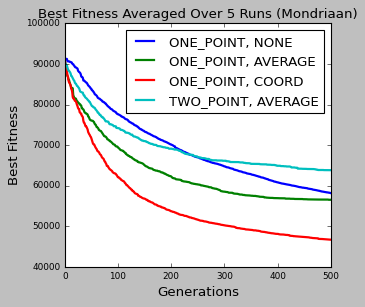

In [43]:
from textwrap import wrap 

x = [i for i in range(500)]

fig, ax = plt.subplots(figsize=(4.5, 4))
lw = 2
plt.plot(x, mondriaan_baseline_ave_best, label='ONE_POINT, NONE', linewidth=lw)
plt.plot(x, mondriaan_1a_run_ave_best, label='ONE_POINT, AVERAGE', linewidth=lw)
plt.plot(x, mondriaan_1c_run_ave_best, label='ONE_POINT, COORD', linewidth=lw)
plt.plot(x, mondriaan_2a_run_ave_best, label='TWO_POINT, AVERAGE', linewidth=lw)

# plt.plot(x, c_average_best, label='Coordinate')
# plt.plot(x, a_average_best, label='Average')
# plt.plot(x, d_average_best, label='Dominant')

# Set the title and labels for the axes
ax.set_title("\n".join(wrap("Best Fitness Averaged Over 5 Runs (Mondriaan)", 60)), fontsize=12)
ax.set_xlabel('Generations')
ax.set_ylabel('Best Fitness')

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Display the plot
plt.tight_layout()
plt.legend(fontsize=12)
plt.show()

In [26]:
# DONALD
donald_1a_c = [sublist + [sublist[-1]] * (500 - len(sublist)) for sublist in donald_1a]

donald_1a_run_ave = np.mean(np.array(donald_1a_c), axis=0)
donald_1a_run_ave_ave  = donald_1a_run_ave[:, 0]
donald_1a_run_ave_best = donald_1a_run_ave[:, 1]

donald_baseline_ave = np.mean(np.array(donald_baseline), axis=0)
donald_baseline_ave_ave  = donald_baseline_ave[:, 0]
donald_baseline_ave_best = donald_baseline_ave[:, 1]


donald_1c_c = [sublist + [sublist[-1]] * (500 - len(sublist)) for sublist in donald_1c]

donald_1c_run_ave = np.mean(np.array(donald_1c_c), axis=0)
donald_1c_run_ave_ave  = donald_1c_run_ave[:, 0]
donald_1c_run_ave_best = donald_1c_run_ave[:, 1]

donald_2a_c = [sublist + [sublist[-1]] * (500 - len(sublist)) for sublist in donal_2a]
donald_2a_run_ave = np.mean(np.array(donald_2a_c), axis=0)
donald_2a_run_ave_ave  = donald_2a_run_ave[:, 0]
donald_2a_run_ave_best = donald_2a_run_ave[:, 1]

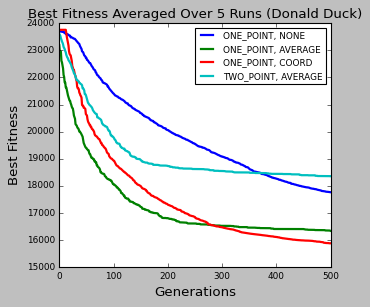

In [42]:
from textwrap import wrap 

x = [i for i in range(500)]

fig, ax = plt.subplots(figsize=(4.5, 4))
lw = 2
plt.plot(x, donald_baseline_ave_best, label='ONE_POINT, NONE', linewidth=lw)
plt.plot(x, donald_1a_run_ave_best, label='ONE_POINT, AVERAGE', linewidth=lw)
plt.plot(x, donald_1c_run_ave_best, label='ONE_POINT, COORD', linewidth=lw)
plt.plot(x, donald_2a_run_ave_best, label='TWO_POINT, AVERAGE', linewidth=lw)

# plt.plot(x, c_average_best, label='Coordinate')
# plt.plot(x, a_average_best, label='Average')
# plt.plot(x, d_average_best, label='Dominant')

# Set the title and labels for the axes
ax.set_title("\n".join(wrap("Best Fitness Averaged Over 5 Runs (Donald Duck)", 60)), fontsize=12)
ax.set_xlabel('Generations')
ax.set_ylabel('Best Fitness')

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Display the plot
plt.tight_layout()
plt.legend(fontsize=8)
plt.show()

In [35]:
# CITY
city_1a_c = a_converted = [sublist + [sublist[-1]] * (500 - len(sublist)) for sublist in city_1a]

city_1a_run_ave = np.mean(np.array(city_1a_c), axis=0)
city_1a_run_ave_ave  = city_1a_run_ave[:, 0]
city_1a_run_ave_best = city_1a_run_ave[:, 1]

city_baseline_ave = np.mean(np.array(city_baseline), axis=0)
city_baseline_ave_ave  = city_baseline_ave[:, 0]
city_baseline_ave_best = city_baseline_ave[:, 1]


city_1c_c = a_converted = [sublist + [sublist[-1]] * (500 - len(sublist)) for sublist in city_1c]
city_1c_run_ave = np.mean(np.array(city_1c_c), axis=0)
city_1c_run_ave_ave  = city_1c_run_ave[:, 0]
city_1c_run_ave_best = city_1c_run_ave[:, 1]

city_2a_c = a_converted = [sublist + [sublist[-1]] * (500 - len(sublist)) for sublist in city_2a]
city_2a_run_ave = np.mean(np.array(city_2a_c), axis=0)
city_2a_run_ave_ave  = city_2a_run_ave[:, 0]
city_2a_run_ave_best = city_2a_run_ave[:, 1]

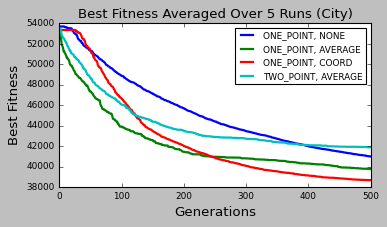

In [44]:
from textwrap import wrap 

x = [i for i in range(500)]

fig, ax = plt.subplots(figsize=(5, 3))
lw = 2
plt.plot(x, city_baseline_ave_best, label='ONE_POINT, NONE', linewidth=lw)
plt.plot(x, city_1a_run_ave_best, label='ONE_POINT, AVERAGE', linewidth=lw)
plt.plot(x, city_1c_run_ave_best, label='ONE_POINT, COORD', linewidth=lw)
plt.plot(x, city_2a_run_ave_best, label='TWO_POINT, AVERAGE', linewidth=lw)

# plt.plot(x, c_average_best, label='Coordinate')
# plt.plot(x, a_average_best, label='Average')
# plt.plot(x, d_average_best, label='Dominant')

# Set the title and labels for the axes
ax.set_title("\n".join(wrap("Best Fitness Averaged Over 5 Runs (City)", 60)), fontsize=12)
ax.set_xlabel('Generations')
ax.set_ylabel('Best Fitness')

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Display the plot
plt.tight_layout()
plt.legend(fontsize=8)
plt.show()